In [ ]:
# C3. Développer des règles d'agrégation de données issues de différentes sources en programmant, sous forme de script, la suppression des
# entrées corrompues et en programmant l’homogénéisation des formats des données afin de préparer le stockage du jeu de données final.



# L'idée est donc si je comprends bien de rassembler les différentes données en un seul et meme dataset 
# Il faut que je valide les données qui vont vraiment servir et etre nécessaires pour proposer des livres avec les modeles d'IA 

# Ma BDD de base est 'books.csv' de '7K books' ( ces livres vont jusqu'a septembre 2019) sur kaggle avec les livres extraits par l'API de Goodreads
# et certaines autres données de Google Books (les thumbnails des livres par exemple ).J'ai également plusieurs autres csv pour les années manquantes 


# Les versions des années manquantes ont été rajoutées et modifiées il faut que je me decide pour savoir quoi garder ,quelles colonnes sont vraiment 
# essentielles pour mes modeles et les prédictions a faire

# Les 'thumbnails' vont sauter pour l'instant
# A ré utiliser peut etre sur la fin quand les livres sont prédits peut etre a l'affichage ? 

In [1]:
%pip install pandas matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 670.4 kB/s eta 0:00:11
   ---- ----------------------------------- 0.8/7.8 MB 859.5 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/7.8 MB 859.5 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.8 MB 718.9 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/7.8 MB 838.9 kB/s eta 0:00:08
   -------- ------------------------------- 1.6/7.8 MB 882.6 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/7.8 MB 890.6 kB/s eta 0:00:07
   ---------- ----------------------------- 2.1/7.8 MB 896.4 kB/s eta 0:00:07
   ------------ --------------------------- 2.4/7.8 MB 938.3 kB/s eta 0:00:06
   ------------ --------------------------- 2.4/7.8 MB 938.3 kB/s eta 0:00:06
   ----------

In [32]:
# On va charger tous les datasets à utiliser ici 

import pandas as pd

# Charger le grand dataset avec raw string
df_grand = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\books.csv")

# Charger les petits datasets annuels
df_2019 = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\booksGoodReadsRatings_2019.csv")
df_2020 = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\booksGoodReadsRatings_2020.csv")
df_2021 = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\booksGoodReadsRatings_2021.csv")
df_2022 = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\booksGoodReadsRatings_2022.csv")
df_2023 = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\booksGoodReadsRatings_2023.csv")
df_2024 = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\booksGoodReadsRatings_2024.csv")

# Ajoute tous les datasets annuels manquants

# Liste des datasets annuels
list_datasets = [df_2019, df_2020,df_2021, df_2022,df_2023, df_2024]  # Ajoute tous les autres datasets ici


In [33]:
df_2022

,title,authors,description,published_date,categories,goodreads_rating
0,It Starts with Us,Colleen Hoover,"Before It Ends with Us, it started with Atlas....",2022-10-18,Fiction,3.71
1,The Boys from Biloxi,John Grisham,#1 NEW YORK TIMES BESTSELLER • Two families. O...,2022-10-18,Fiction,3.60
2,Fairy Tale,Stephen King,"From legendary storyteller Stephen King, comes...",2022-09-06,Fiction,4.16
3,Dreamland,Nicholas Sparks,From the #1 New York Times bestselling author ...,2022-09-20,Fiction,4.50
4,A World of Curiosities,Louise Penny,INSTANT #1 NEW YORK TIMES BESTSELLER Chief Ins...,2022-11-29,Fiction,4.00
...,...,...,...,...,...,...
99,A Christmas Promise,Nora Roberts,Celebrate the holidays with #1 New York Times ...,2022-09-27,Fiction,3.49
100,"Map of Flames (The Forgotten Five, Book 1)",Lisa McMann,X-Men meets Spy Kids in this instant New York ...,2022-02-22,Juvenile Fiction,3.76
101,She's Gone,David Bell,A new page-turning thriller from USA Today bes...,2022-11-01,Young Adult Fiction,3.65
102,Demon Slayer: Kimetsu no Yaiba—The Flower of H...,Aya Yajima,A mystical flower offers a prosperous future f...,2022-10-25,Fiction,4.16


In [38]:

# Fonction pour convertir 'published_date' en 'published_year' (extraire uniquement l'année)
def convertir_published_year(df):
    # Transformer 'published_date' en 'published_year' en extrayant l'année
    df['published_year'] = pd.to_datetime(df['published_date'], errors='coerce').dt.year
    # Supprimer la colonne 'published_date' car elle est remplacée par 'published_year'
    df.drop(columns=['published_date'], inplace=True)
    return df

# Appliquer la transformation sur chaque dataset
for i, df in enumerate(list_datasets):
    list_datasets[i] = convertir_published_year(df)



KeyError: 'published_date'

In [39]:
#Bug au dessus car published_date a deja sauté

# Fonction pour renommer 'goodreads_rating' en 'average_rating'
def renommer_goodreads_rating(df):
    # Renommer la colonne 'goodreads_rating' en 'average_rating' si elle existe
    if 'goodreads_rating' in df.columns:
        df.rename(columns={'goodreads_rating': 'average_rating'}, inplace=True)
    return df

# Appliquer la transformation sur chaque petit dataset
for i, df in enumerate(list_datasets):
    list_datasets[i] = renommer_goodreads_rating(df)

# Vérification de la transformation sur un des datasets
for i, df in enumerate(list_datasets):
    print(f"Premières lignes du dataset {i+1} après renommage :")
    print(df[['title', 'average_rating']].head())


Premières lignes du dataset 1 après renommage :
                  title  average_rating
0         The Guardians            4.14
1           Criss Cross            4.26
2  A Minute to Midnight            4.21
3             Blue Moon            3.96
4    The Silent Patient            3.93
Premières lignes du dataset 2 après renommage :
                title  average_rating
0    A Time for Mercy            4.29
1  The Vanishing Half            3.50
2          The Return            4.56
3            Daylight            4.20
4           Home Body            4.07
Premières lignes du dataset 3 après renommage :
                             title  average_rating
0            Call Us What We Carry            3.33
1                 The Judge's List            3.60
2              The Lincoln Highway            4.31
3     The Stranger in the Lifeboat            3.29
4  Go Tell the Bees That I Am Gone            3.13
Premières lignes du dataset 4 après renommage :
                    title  average

In [35]:
# Vérification de la transformation sur un des datasets
for i, df in enumerate(list_datasets):
    print(f"Premières lignes du dataset {i+1} après transformation :")
    print(df[['title', 'published_year']].head())

Premières lignes du dataset 1 après transformation :
                  title  published_year
0         The Guardians          2019.0
1           Criss Cross          2019.0
2  A Minute to Midnight          2019.0
3             Blue Moon          2019.0
4    The Silent Patient          2019.0
Premières lignes du dataset 2 après transformation :
                title  published_year
0    A Time for Mercy            2020
1  The Vanishing Half            2020
2          The Return            2020
3            Daylight            2020
4           Home Body            2020
Premières lignes du dataset 3 après transformation :
                             title  published_year
0            Call Us What We Carry          2021.0
1                 The Judge's List          2021.0
2              The Lincoln Highway          2021.0
3     The Stranger in the Lifeboat          2021.0
4  Go Tell the Bees That I Am Gone          2021.0
Premières lignes du dataset 4 après transformation :
              

In [40]:
df_2020

,title,authors,description,categories,average_rating,published_year
0,A Time for Mercy,John Grisham,***THE SUNDAY TIMES BESTSELLER*** Jake Briganc...,Fiction,4.29,2020
1,The Vanishing Half,Brit Bennett,#1 NEW YORK TIMES BESTSELLER ONE OF BARACK OBA...,Fiction,3.50,2020
2,The Return,Nicholas Sparks,A house full of love. A house full of secrets....,Fiction,4.56,2020
3,Daylight,David Baldacci,"In this gripping mystery, an FBI Agent’s searc...",Fiction,4.20,2020
4,Home Body,Rupi Kaur,From the Number One Sunday Times bestselling a...,Poetry,4.07,2020
...,...,...,...,...,...,...
96,A MacCallister Christmas,"William W. Johnstone, J.A. Johnstone",New York Times Bestseller From bestselling aut...,Fiction,4.29,2020
97,The Christmas Backup Plan,Lori Wilde,A regimented ex-Army man drives an irresistibl...,Fiction,3.88,2020
98,Look Both Ways,Jason Reynolds,"""A collection of ten short stories that all ta...",Juvenile Fiction,3.00,2020
99,Five Total Strangers,Natalie D. Richards,"A New York Times Bestseller A ""page-turning th...",Young Adult Fiction,3.00,2020


In [42]:
df_grand_reduit

,title,authors,description,published_year,average_rating,categories
0,Gilead,Marilynne Robinson,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,Fiction
1,Spider's Web,Charles Osborne;Agatha Christie,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,Detective and mystery stories
2,The One Tree,Stephen R. Donaldson,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,American fiction
3,Rage of angels,Sidney Sheldon,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,Fiction
4,The Four Loves,Clive Staples Lewis,Lewis' work on the nature of love divides love...,2002.0,4.15,Christian life
...,...,...,...,...,...,...
6804,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,Health & Fitness
6805,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,This collection of the timeless teachings of o...,1999.0,4.51,Philosophy
6806,Secrets Of The Heart,Khalil Gibran,NaN,1993.0,4.08,Mysticism
6808,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,Since the three volume edition ofHegel's Philo...,1981.0,0.00,History


In [43]:
# 1. Vérifier que les colonnes sont identiques
print("Colonnes dans df_grand_reduit :", df_grand_reduit.columns)
print("Colonnes dans un petit dataset (df_2020) :", df_2020.columns)

# 2. Vérifier les types de données dans df_grand_reduit et un petit dataset
print("Types des colonnes dans df_grand_reduit :")
print(df_grand_reduit.dtypes)
print("Types des colonnes dans df_2020 :")
print(df_2020.dtypes)

# 3. Vérifier s'il y a des valeurs manquantes (NaN) dans les colonnes importantes
print("Valeurs manquantes dans df_grand_reduit :")
print(df_grand_reduit.isna().sum())
print("Valeurs manquantes dans df_2020 :")
print(df_2020.isna().sum())

# 4. Vérifier la cohérence des valeurs dans les colonnes clés (par exemple, average_rating et published_year)
print("Statistiques descriptives pour df_grand_reduit :")
print(df_grand_reduit[['average_rating', 'published_year']].describe())
print("Statistiques descriptives pour df_2020 :")
print(df_2020[['average_rating', 'published_year']].describe())


Colonnes dans df_grand_reduit : Index(['title', 'authors', 'description', 'published_year', 'average_rating',
       'categories'],
      dtype='object')
Colonnes dans un petit dataset (df_2020) : Index(['title', 'authors', 'description', 'categories', 'average_rating',
       'published_year'],
      dtype='object')
Types des colonnes dans df_grand_reduit :
title              object
authors            object
description        object
published_year    float64
average_rating    float64
categories         object
dtype: object
Types des colonnes dans df_2020 :
title              object
authors            object
description        object
categories         object
average_rating    float64
published_year      int32
dtype: object
Valeurs manquantes dans df_grand_reduit :
title               0
authors            72
description       251
published_year      6
average_rating     39
categories         92
dtype: int64
Valeurs manquantes dans df_2020 :
title             0
authors           0
desc

In [ ]:
# Les colonnes dans df_grand_reduit et df_2020 sont les mêmes, mais dans un ordre différent. 
# Cela ne devrait pas poser de problème pour la concaténation, 
# car pandas.concat() aligne les colonnes par leur nom et non par leur ordre.

In [45]:
# Utiliser .loc[] pour modifier 'published_year' dans df_grand_reduit
df_grand_reduit.loc[:, 'published_year'] = df_grand_reduit['published_year'].fillna(0).astype(int)



In [47]:
# 1. Vérifier que les colonnes sont identiques
print("Colonnes dans df_grand_reduit :", df_grand_reduit.columns)

# Vérifier les colonnes dans tous les petits datasets
for i, df in enumerate(list_datasets):
    print(f"Colonnes dans le petit dataset {i+1} :", df.columns)

# 2. Vérifier les types de données dans df_grand_reduit
print("\nTypes des colonnes dans df_grand_reduit :")
print(df_grand_reduit.dtypes)

# Vérifier les types de données dans tous les petits datasets
for i, df in enumerate(list_datasets):
    print(f"Types des colonnes dans le petit dataset {i+1} :")
    print(df.dtypes)

# 3. Vérifier s'il y a des valeurs manquantes (NaN) dans df_grand_reduit
print("\nValeurs manquantes dans df_grand_reduit :")
print(df_grand_reduit.isna().sum())

# Vérifier les valeurs manquantes dans tous les petits datasets
for i, df in enumerate(list_datasets):
    print(f"Valeurs manquantes dans le petit dataset {i+1} :")
    print(df.isna().sum())

# 4. Vérifier la cohérence des valeurs dans les colonnes clés pour df_grand_reduit
print("\nStatistiques descriptives pour df_grand_reduit :")
print(df_grand_reduit[['average_rating', 'published_year']].describe())

# Vérifier la cohérence des valeurs dans les colonnes clés pour tous les petits datasets
for i, df in enumerate(list_datasets):
    print(f"Statistiques descriptives pour le petit dataset {i+1} :")
    print(df[['average_rating', 'published_year']].describe())


Colonnes dans df_grand_reduit : Index(['title', 'authors', 'description', 'published_year', 'average_rating',
       'categories'],
      dtype='object')
Colonnes dans le petit dataset 1 : Index(['title', 'authors', 'description', 'categories', 'average_rating',
       'published_year'],
      dtype='object')
Colonnes dans le petit dataset 2 : Index(['title', 'authors', 'description', 'categories', 'average_rating',
       'published_year'],
      dtype='object')
Colonnes dans le petit dataset 3 : Index(['title', 'authors', 'description', 'categories', 'average_rating',
       'published_year'],
      dtype='object')
Colonnes dans le petit dataset 4 : Index(['title', 'authors', 'description', 'categories', 'average_rating',
       'published_year'],
      dtype='object')
Colonnes dans le petit dataset 5 : Index(['title', 'authors', 'description', 'categories', 'average_rating',
       'published_year'],
      dtype='object')
Colonnes dans le petit dataset 6 : Index(['title', 'authors',

In [ ]:
# Valeurs manquantes dans df_grand_reduit :
# title               0
# authors            72
# description       251
# published_year      0
# average_rating     39
# categories         92
# dtype: int64

# il faut donc completer ceci ou faire sauter ces lignes 

In [48]:
# Afficher le nombre de lignes avant la suppression des lignes a info manquantes dans le grand dataset
print(f"Nombre de lignes avant suppression : {len(df_grand_reduit)}")

# Supprimer les lignes contenant des valeurs manquantes dans df_grand_reduit
df_grand_reduit_clean = df_grand_reduit.dropna()

# Afficher le nombre de lignes après la suppression
print(f"Nombre de lignes après suppression : {len(df_grand_reduit_clean)}")

# Afficher les premières lignes pour vérifier
print(df_grand_reduit_clean.head())


Nombre de lignes avant suppression : 6628
Nombre de lignes après suppression : 6245
            title                          authors  \
0          Gilead               Marilynne Robinson   
1    Spider's Web  Charles Osborne;Agatha Christie   
2    The One Tree             Stephen R. Donaldson   
3  Rage of angels                   Sidney Sheldon   
4  The Four Loves              Clive Staples Lewis   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...            2004   
1  A new 'Christie for Christmas' -- a full-lengt...            2000   
2  Volume Two of Stephen Donaldson's acclaimed se...            1982   
3  A memorable, mesmerizing heroine Jennifer -- b...            1993   
4  Lewis' work on the nature of love divides love...            2002   

   average_rating                     categories  
0            3.85                        Fiction  
1            3.83  Detective and mystery stories  
2    

In [49]:
# Afficher le nombre de lignes avant et après la suppression des lignes avec valeurs manquantes dans les petits datasets
for i, df in enumerate(list_datasets):
    print(f"Nombre de lignes dans le dataset {i+1} avant suppression : {len(df)}")
    
    # Supprimer les lignes contenant des valeurs manquantes dans chaque petit dataset
    list_datasets[i] = df.dropna()
    
    print(f"Nombre de lignes dans le dataset {i+1} après suppression : {len(list_datasets[i])}")
    print(f"Premières lignes du dataset {i+1} après suppression :")
    print(list_datasets[i].head())


Nombre de lignes dans le dataset 1 avant suppression : 102
Nombre de lignes dans le dataset 1 après suppression : 98
Premières lignes du dataset 1 après suppression :
                  title           authors  \
0         The Guardians      John Grisham   
1           Criss Cross   James Patterson   
2  A Minute to Midnight    David Baldacci   
3             Blue Moon         Lee Child   
4    The Silent Patient  Alex Michaelides   

                                         description categories  \
0  #1 NEW YORK TIMES BEST SELLER • A classic lega...    Fiction   
1  SOON TO BE AN ORIGINAL AMAZON PRIME SERIES ___...    Fiction   
2  A Minute to Midnight is the gripping follow up...    Fiction   
3  AS FEATURED ON RICHARD & JUDY'S 'KEEP READING ...    Fiction   
4  - THE RECORD-BREAKING, MULTIMILLION COPY GLOBA...    Fiction   

   average_rating  published_year  
0            4.14          2019.0  
1            4.26          2019.0  
2            4.21          2019.0  
3            3.

In [50]:
import pandas as pd

# Concaténer le grand dataset avec tous les petits datasets
df_concatene = pd.concat([df_grand_reduit] + list_datasets, ignore_index=True)

# Afficher quelques lignes pour vérifier le résultat
print(f"Nombre total de lignes après concaténation : {len(df_concatene)}")
print(df_concatene.head())

# Sauvegarder le DataFrame concaténé dans un fichier CSV
df_concatene.to_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\final_dataset_concatene.csv", index=False)

print("Concaténation terminée et fichier sauvegardé.")


Nombre total de lignes après concaténation : 7248
            title                          authors  \
0          Gilead               Marilynne Robinson   
1    Spider's Web  Charles Osborne;Agatha Christie   
2    The One Tree             Stephen R. Donaldson   
3  Rage of angels                   Sidney Sheldon   
4  The Four Loves              Clive Staples Lewis   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating                     categories  
0            3.85                        Fiction  
1            3.83  Detective and mystery stories  
2            3.97               America

In [51]:
# Verif du fichier final 

import pandas as pd

# Charger le fichier concaténé (final_dataset_concatene.csv)
df_final = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\final_dataset_concatene.csv")

# 1. Vérifier les colonnes du DataFrame final
print("Colonnes dans le DataFrame final :", df_final.columns)

# 2. Vérifier les types de données dans le DataFrame final
print("\nTypes des colonnes dans le DataFrame final :")
print(df_final.dtypes)

# 3. Vérifier s'il y a des valeurs manquantes (NaN) dans le DataFrame final
print("\nValeurs manquantes dans le DataFrame final :")
print(df_final.isna().sum())

# 4. Vérifier la cohérence des valeurs dans les colonnes clés (par exemple, 'average_rating' et 'published_year')
print("\nStatistiques descriptives pour le DataFrame final :")
print(df_final[['average_rating', 'published_year']].describe())

# Afficher les premières lignes pour vérifier le contenu du DataFrame final
print("\nPremières lignes du DataFrame final :")
print(df_final.head())


Colonnes dans le DataFrame final : Index(['title', 'authors', 'description', 'published_year', 'average_rating',
       'categories'],
      dtype='object')

Types des colonnes dans le DataFrame final :
title              object
authors            object
description        object
published_year    float64
average_rating    float64
categories         object
dtype: object

Valeurs manquantes dans le DataFrame final :
title               0
authors            72
description       251
published_year      0
average_rating     39
categories         92
dtype: int64

Statistiques descriptives pour le DataFrame final :
       average_rating  published_year
count     7209.000000     7248.000000
mean         3.938828     1999.000000
std          0.337629       58.749395
min          0.000000        0.000000
25%          3.770000     1997.000000
50%          3.960000     2003.000000
75%          4.140000     2006.000000
max          5.000000     2024.000000

Premières lignes du DataFrame final :
  

In [52]:
import pandas as pd

# Charger le fichier concaténé (final_dataset_concatene.csv)
df_final = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\final_dataset_concatene.csv")

# Afficher le nombre de lignes avant la suppression
print(f"Nombre de lignes avant suppression des valeurs manquantes : {len(df_final)}")

# Supprimer les lignes contenant des valeurs manquantes dans n'importe quelle colonne
df_final_clean = df_final.dropna()

# Afficher le nombre de lignes après la suppression
print(f"Nombre de lignes après suppression des valeurs manquantes : {len(df_final_clean)}")

# Afficher les premières lignes pour vérifier
print(df_final_clean.head())

# Sauvegarder le DataFrame nettoyé dans un nouveau fichier CSV
df_final_clean.to_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\final_dataset_clean.csv", index=False)

print("Suppression des lignes avec valeurs manquantes terminée et fichier sauvegardé.")


Nombre de lignes avant suppression des valeurs manquantes : 7248
Nombre de lignes après suppression des valeurs manquantes : 6865
            title                          authors  \
0          Gilead               Marilynne Robinson   
1    Spider's Web  Charles Osborne;Agatha Christie   
2    The One Tree             Stephen R. Donaldson   
3  Rage of angels                   Sidney Sheldon   
4  The Four Loves              Clive Staples Lewis   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating                     categories  
0            3.85                        Fiction  
1         

In [54]:
! pip install seaborn

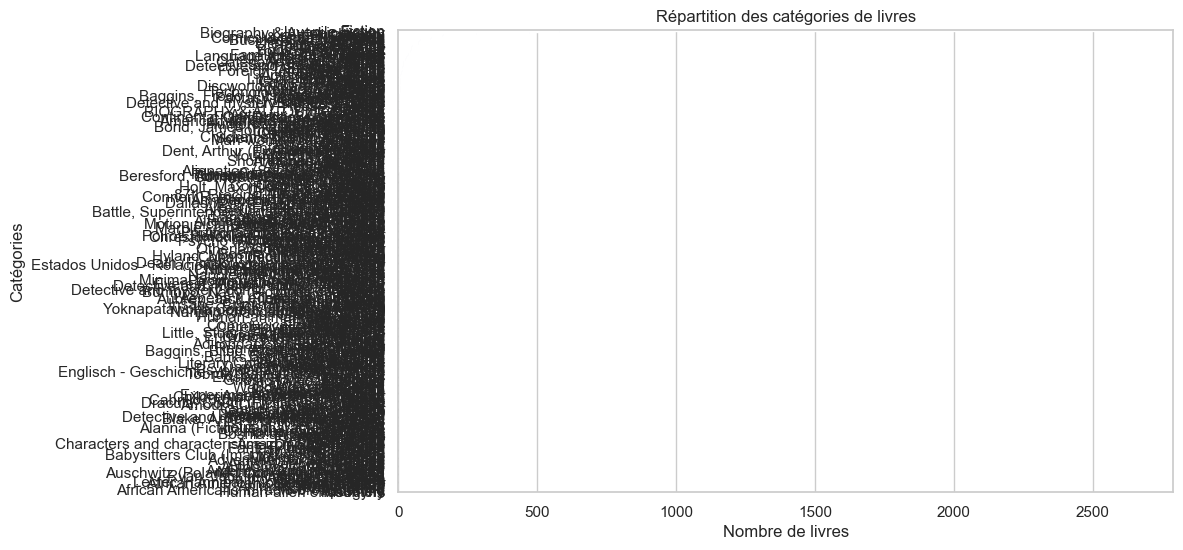

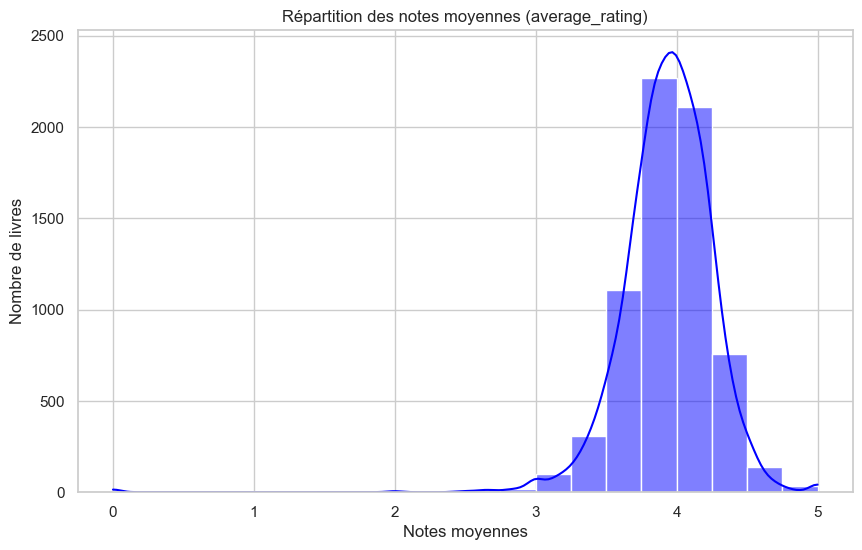

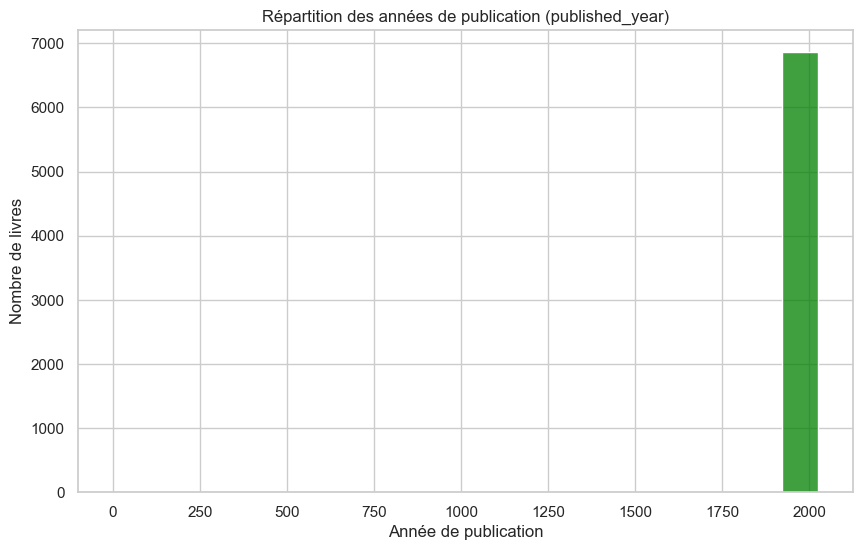

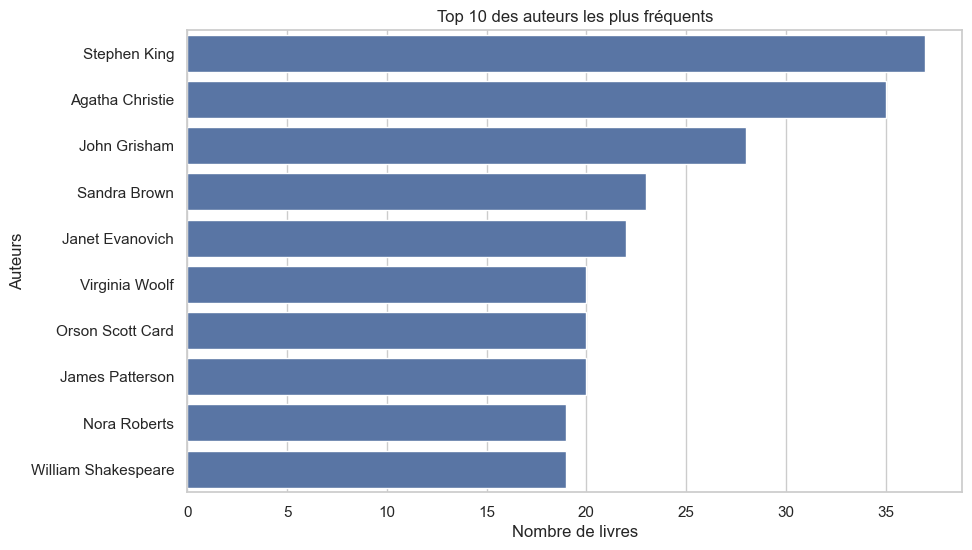

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier concaténé nettoyé
df_final_clean = pd.read_csv(r"C:\Users\User\Downloads\CoursAlternance\Chefoeuvre\RecommendationsLectures\final_dataset_clean.csv")

# Configurer les styles de graphique
sns.set(style="whitegrid")

# 1. Répartition des catégories de livres (barplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final_clean, y="categories", order=df_final_clean['categories'].value_counts().index)
plt.title('Répartition des catégories de livres')
plt.xlabel('Nombre de livres')
plt.ylabel('Catégories')
plt.show()

# 2. Répartition des notes moyennes (average_rating) (histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(df_final_clean['average_rating'], bins=20, kde=True, color='blue')
plt.title('Répartition des notes moyennes (average_rating)')
plt.xlabel('Notes moyennes')
plt.ylabel('Nombre de livres')
plt.show()

# 3. Répartition des années de publication (published_year) (histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(df_final_clean['published_year'], bins=20, kde=False, color='green')
plt.title('Répartition des années de publication (published_year)')
plt.xlabel('Année de publication')
plt.ylabel('Nombre de livres')
plt.show()


# 4. Répartition des auteurs (barplot des auteurs les plus fréquents)
plt.figure(figsize=(10, 6))
top_authors = df_final_clean['authors'].value_counts().nlargest(10)
sns.barplot(x=top_authors, y=top_authors.index)
plt.title('Top 10 des auteurs les plus fréquents')
plt.xlabel('Nombre de livres')
plt.ylabel('Auteurs')
plt.show()


In [ ]:
# je trouve bizarre il n'y a pas plus de 300 de rajoutes dans le gros dataset ? 

#probablement du au fait qu'il y avait des doublons etc ?

# est ce qu'il faut pas Enlever toutes ces phrases generees automatiquement '#1 NEW YORK TIMES BESTSELLER' ca va porter a confusion pour les calculs du modele et ca
# n'apporte rien ? Apres ca enleve le sens des phrases aussi quoi ...
